### Basis set expansion
$$
\psi(x) = \sum_\mu c_\mu \phi_\mu (x)
$$

$\{ \phi_1, \phi_2, \ldots\}$ defines a basis set

$\{ c_1, c_2, \ldots\}$ are the corresponding expansion coefficients

###  **Time-Independent Schrödinger Equation in basis set**:

$$
\hat{H} \sum_\mu c_\mu \phi_\mu (x) = E \sum_\mu c_\mu \phi_\mu (x)
$$

### The Schrödinger Equation in matrix multiplication form
$H$ is a matrix, and its element

$H_{\nu\mu}$: $\langle\phi_\nu| H |\phi_\mu\rangle$

$S$ is a matrix, and its element

$S_{\nu\mu}$: $\langle\phi_\nu| \phi_\mu\rangle$

$$
\sum_\mu H_{\nu\mu} c_\mu = E \sum_\mu S_{\nu\mu} c_\mu
$$

$c$ is a vector with elements $c_\mu$

So we made the Schrödinger Equation into a matrix multiplication form!

$$
H c = E S c
$$

$$
(S^{-1}H) c = E c
$$

$$
cSc = 1
$$

### Solve wave function for harmonic ocsillator

$$\hat{H} =  -\frac{1}{2}\frac{d^2}{dx^2} + \frac{1}{2} x^2 $$

In [1]:
# import packages for basic math, plotting, linear algebra, random number generation, etc.from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_space = np.linspace(-5, 5, 500)
Ux = 0.5 * x_space**2.
psi0_exact = np.pi**(-1./4.) * np.exp(-x_space**2./2)

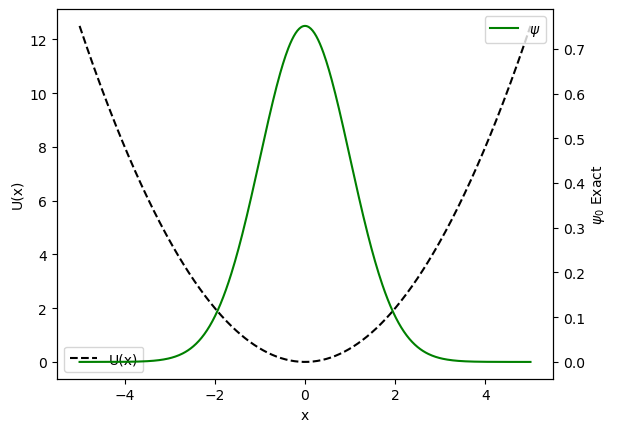

In [3]:
# Create the figure and first axes
fig, ax1 = plt.subplots()

ax1.plot(x_space, Ux, 'k--', label='U(x)')

ax1.set_xlabel('x')
ax1.set_ylabel('U(x)')

ax1.legend()

# Create a second y-axis on the right
ax2 = ax1.twinx()

ax2.plot(x_space, psi0_exact, 'g-', label='$\psi$')
ax2.set_ylabel('$\psi_0$ Exact')

ax2.legend()

### Gaussian basis set
$$
g(x) = \exp( - \alpha x^2)
$$

$$
\phi_A (x) = g(x-x_A)
$$

#### Compute the matrix elements 
$H_{AB}$: $\langle\phi_A| H |\phi_B\rangle$ and
$S_{AB}$: $\langle\phi_A| \phi_B\rangle$

$$
H_{AB} = \int dx \exp\left( - \alpha (x-x_A)^2\right) 
\left(-\frac{d^2}{dx^2} + \frac{1}{2} x^2\right) 
\exp \left( - \alpha (x-x_B)^2 \right)
$$

$$
S_{AB} = \int dx \exp\left( - \alpha (x-x_A)^2\right)
\exp \left( - \alpha (x-x_B)^2 \right)
$$

In the homework, you will show

$$
S_{AB} = \sqrt{\dfrac{\pi}{2\alpha}}
\exp \left( - \dfrac{\alpha}{2} (x_A-x_B)^2 \right)
$$

$$
H_{AB} = \dfrac{1}{2}S_{AB}
\left[
\alpha - \alpha^2(x_A-x_B)^2 + \dfrac{1}{4}(\dfrac{1}{2} + (x_A+x_B)^2)
\right]
$$

In [4]:
def phi_A_func(x_space, A, alpha=2.):
    return np.exp(-alpha*(x_space - A) ** 2.)

In [12]:
def S_AB_func(xA, xB, alpha):
    return (0.5*np.pi/alpha)**0.5 * np.exp(-0.5*alpha* (xA - xB)**2 )

def H_AB_func(xA, xB, alpha):
    return 0.5* S_AB_func(xA, xB, alpha) * (alpha - alpha**2 * (xA - xB)**2 + \
                             0.25*(1/alpha + (xA + xB)**2 ))

In [30]:
def S_H_AB_func(xA, xB, alpha):
    S_AB =  S_AB_func(xA, xB, alpha)
    H_AB = 0.5* S_AB * (alpha - alpha**2 * (xA - xB)**2 + \
                             0.25*(1/alpha + (xA + xB)**2 ))
    return S_AB, H_AB

In [13]:
alpha = 2

In [21]:
gaussian_centers = np.linspace(-4, 4, 9)
n_basis = len(gaussian_centers)

In [22]:
n_basis

9

In [68]:
def find_eigval_eigvec(S_AB, H_AB):
    # compute S^{-1}H
    S_inv_H = np.linalg.inv(S_AB) @ H_AB
    # eigval[i]  -> eigenvectors[:,i]
    eigval, eigvec = np.linalg.eig(S_inv_H)
    
    index_sort = np.argsort(eigval)
    eigval_sorted = eigval[index_sort]
    eigvec_sorted = eigvec[:, index_sort]
    
    for i in range(len(eigvec_sorted)):
        eigvec_sorted[:,i] /= np.sqrt(eigvec_sorted[:,i] @ S_AB @ eigvec_sorted[:,i])
        
    return eigval_sorted, eigvec_sorted

In [70]:
eigval, eigvec = find_eigval_eigvec(S_AB, H_AB)

In [84]:
eigval, eigvec = {}, {}

In [85]:
for n_basis in [5, 9, 15, 21]:
    gaussian_centers = np.linspace(-4, 4, n_basis)
    S_AB, H_AB = S_H_AB_func(gaussian_centers[:,None], gaussian_centers[None,:], alpha)
    eigval[n_basis], eigvec[n_basis] = find_eigval_eigvec(S_AB, H_AB)

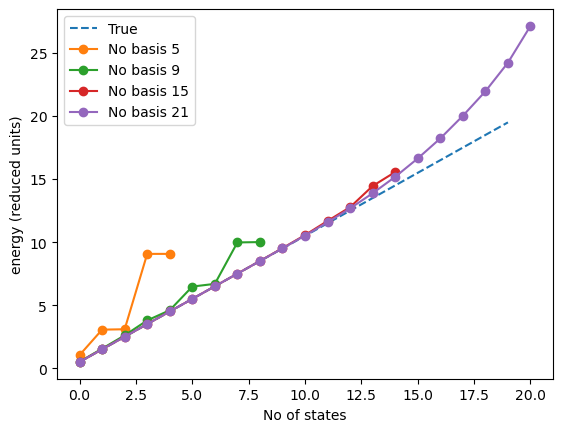

In [92]:

plt.plot(np.arange(20), np.arange(20)+0.5, '--', label='True')

for n_basis in [5, 9, 15, 21]:
    plt.plot(np.arange(len(eigval[n_basis])), eigval[n_basis], 'o-', label='No basis '+str(n_basis))

plt.xlabel("No of states")
plt.ylabel('energy (reduced units)')

plt.legend()

In [94]:
Psi = {}

In [109]:
wave_function_index = 4 # ground state

for n_basis in [5, 9, 15, 21]:

    Psi[n_basis] = np.zeros_like(x_space)
    gaussian_centers = np.linspace(-4, 4, n_basis)
    for i, g_A in enumerate(gaussian_centers):
        #print(n_basis, eigvec[n_basis].shape)
        Psi[n_basis] += phi_A_func(x_space, g_A, alpha) * eigvec[n_basis][i,wave_function_index]

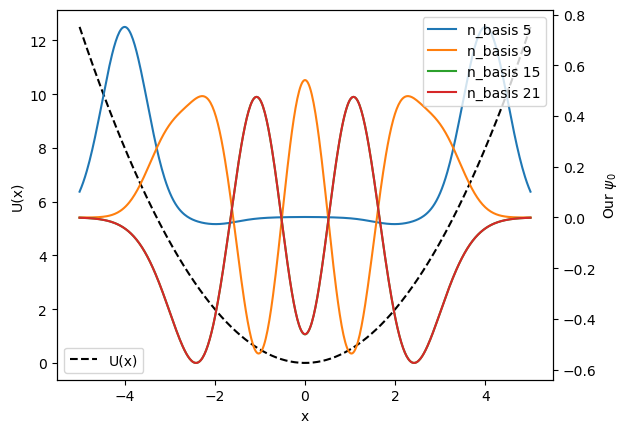

In [110]:
# Create the figure and first axes
fig, ax1 = plt.subplots()

ax1.plot(x_space, Ux, 'k--', label='U(x)')

ax1.set_xlabel('x')
ax1.set_ylabel('U(x)')

ax1.legend()

# Create a second y-axis on the right
ax2 = ax1.twinx()

#ax2.plot(x_space, psi0_exact, 'r-', label='$\psi$')
#ax2.set_ylabel('$\psi_0$ Exact')

for n_basis in [5, 9, 15, 21]:
    ax2.plot(x_space, Psi[n_basis], label='n_basis '+str(n_basis))
ax2.set_ylabel('Our $\psi_0$')

ax2.legend()